

The immensity of possible interactions and configurations of proteins is intimidating, but it turns out that proteins occupy only tiny islands in a vast sea of possible configurations. By finding simple patterns in protein configurations, we can focus only on these islands and make the protein folding problem much more tractable.

A protein is a linear sequence of amino acids, each of which is constrained to a plane. The bonds connecting each amino acid are free to rotate, so the configuration of two adjacent amino acids can be described using their dihedral angles. Naively, every pair of amino acids could have angles anywhere between and radians, but that’s not what we find.

The Python environment below takes in the 3D structure of hemoglobin and measures the dihedral angles between every amino acid. The program outputs a scatter plot of all the different orientations in the protein.

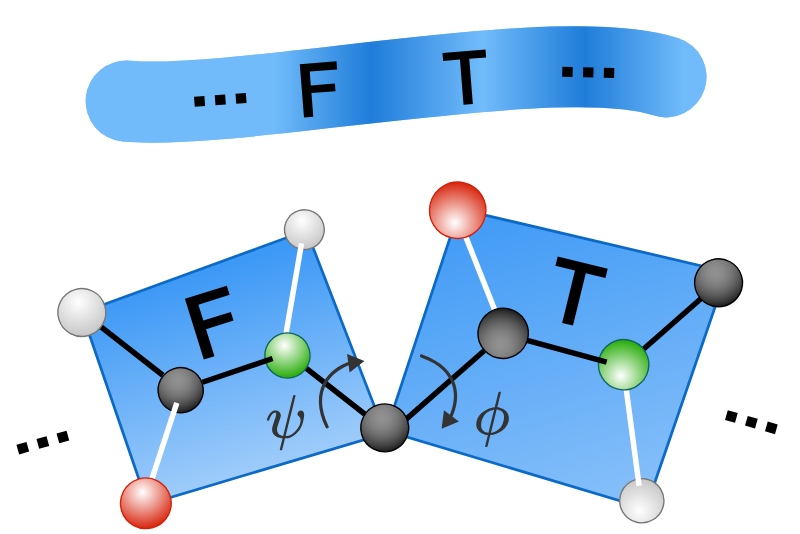

In [7]:
from IPython.display import Image
Image("Img/uuFB37b1tT-frame-4-8.svg.png")

In [1]:
# Import Biopython, Matplotlib and NumPy libraries
import Bio.PDB
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np

In [4]:
# Import the Hemoglobin coordinates file from the Protein Data Bank.
structure = Bio.PDB.PDBParser(QUIET=True).get_structure('Hemoglobin', 'Data/1a3n.pdb')

In [5]:
# Define a function to build a model of the protein from the coordinates
def build_model(structure):
    angles = []
    for model in structure:
        for chain in model:
            polypeptides = Bio.PDB.CaPPBuilder().build_peptides(chain)
            #Extract angles for each amino acid.
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    phi, psi = phi_psi[res_index]
                    if phi and psi:
                        #Generate an array with the attributes of each amino acid in the protein.
                        angles.append(['Hemoglobin', str(chain.id), residue.resname,
                                       residue.id[1], phi / np.pi, psi / np.pi])
    return np.array(angles)

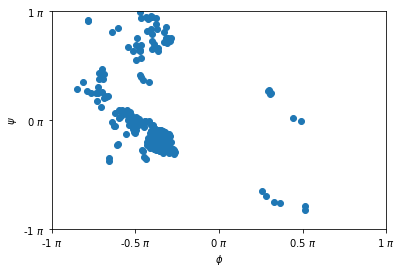

In [6]:
# Run our function.
angles = build_model(structure)
phi = np.array(angles[:, 4], dtype='float')
psi = np.array(angles[:, 5], dtype='float')

# Plot the results
f, ax = plt.subplots(1)

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1))
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
ax.scatter(phi, psi)

plt.savefig("Islands.png", format="png")

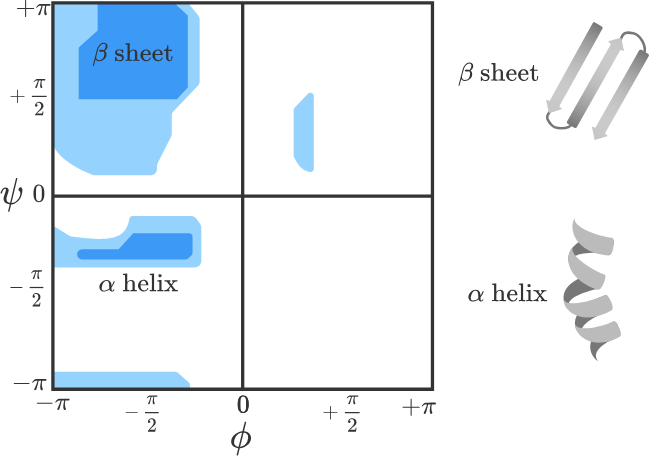

In [9]:
Image("Img/SM6fZzQh78-q6p8-1.svg.png")

The two largest islands in protein configurational space are called alpha helices and beta sheets for the characteristic shapes of their folds. Together with several other common motifs, these are known as protein secondary structures. Though an amino acid could theoretically occupy a configuration with an arbitrary torsion angle, finding patterns of different configurations can help us improve our "guesses" of possible protein structures.

Not only do different secondary structures appear as islands in plot of possible dihedral angles, the different amino acids tend to occupy one secondary structure over the others due to their unique chemical properties. Knowledge of these patterns can help us even more to find the native fold.

We will find these patterns by mining protein structures. The Python environment below has been prepared to generate torsion distributions for three different amino acid patterns Glycine
, Alanine , and any amino acid preceding a Proline

You'll learn how to use Python to perform analysis on patterns of protein folding in an upcoming chapter.

What conclusions can you make about the structural tendencies of these amino acids using the "map" of amino acid configurations above? 

In [10]:
# Import the Hemoglobin coordinates file from the Protein Data Bank.
structure = Bio.PDB.PDBParser(QUIET=True).get_structure('Hemoglobin', 'data/1a3n.pdb')

In [11]:
# Define a function to build a model of the protein from the coordinates.
def build_model(structure, resid, offset):
    angles = list()
    for model in structure:
        for chain in model:
            polypeptides = Bio.PDB.CaPPBuilder().build_peptides(chain)
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    phi, psi = phi_psi[res_index]
                    if (phi and psi) and poly[res_index + offset].resname == resid:
                        angles.append(['Hemoglobin', str(chain.id), residue.resname,
                                       residue.id[1], phi / np.pi, psi / np.pi])
    return np.array(angles)


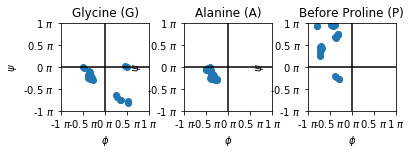

In [12]:
# Run our function.
angles_gly = build_model(structure, 'GLY', 0)
angles_ala = build_model(structure, 'ALA', 0)
angles_pre_pro = build_model(structure, 'PRO', 1)

# Plot the results

fig = plt.figure()
ax1 = plt.subplot(131, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
plt.subplots_adjust(wspace=0.4)
ax1.scatter(angles_gly[:, 4].astype(float), angles_gly[:, 5].astype(float))
ax1.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax1.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax1.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax1.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Glycine (G)')

ax2 = plt.subplot(132, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
ax2.scatter(angles_ala[:, 4].astype(float), angles_ala[:, 5].astype(float))
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax2.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Alanine (A)')

ax3 = plt.subplot(133, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
ax3.scatter(angles_pre_pro[:, 4].astype(float), angles_pre_pro[:, 5].astype(float))
ax3.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax3.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax3.axhline(y=0, color='k')
ax3.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Before Proline (P)')

plt.savefig("Islands.png", format="png")

## Interpretation

Explanation

Correct answer:
G is flexible, A tends to form helices, and P is a helix-breaker

The location of different amino acids in the protein's configurational space are shown in the subplots generated by the Python environment.

The distribution of configurations for Glycine (G) in this protein is all over the configurational space, with no clear preference for a given structure (like alpha helices, or beta sheets). This implies that the residue is very flexible. Alanine (A), on the other hand, tends overwhelmingly to appear in the second quadrant of the plot, implying that it tends to appear in alpha helices.

The torsion angle distributions for amino acids which come before Proline (P) is interesting. They tend to not appear in an alpha helical region of configurational space. This is why prolines are considered "helix-breakers."